Case 1

In [ ]:
import pandas as pd
import networkx as nx

#Folder for saving
graphsFolder="MyGraphs/"

LinkToData = "https://github.com/DACSS-CSSmeths/Networks_intro/raw/refs/heads/main/casesData/dataFigueroa.xlsx"

FigureData = pd.read_excel(LinkToData, sheet_name="Relationships", index_col=0)  # Load adjacency matrix
FigureAttr = pd.read_excel(LinkToData, sheet_name="Attributes")  # Load node attributes

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

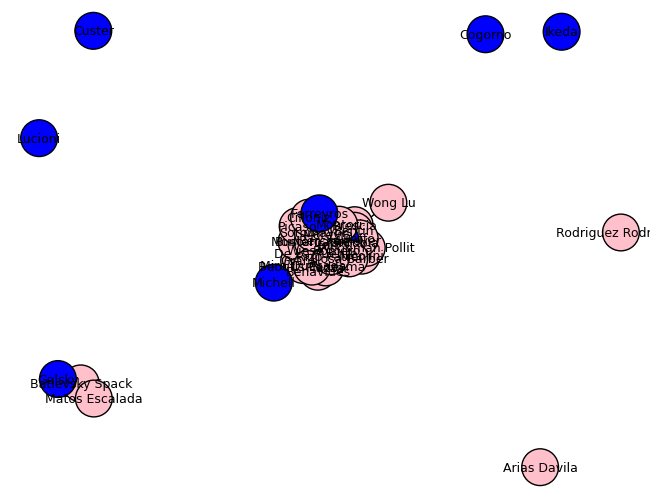

In [ ]:
# Create an undirected graph (data is symmetric)
G = nx.from_pandas_adjacency(FigureData, create_using=nx.Graph())

# Add node attributes
attr_dict = FigureAttr.set_index("node")["Multinacional"].to_dict()
nx.set_node_attributes(G, attr_dict, "Multinacional")

# Assign colors
node_colors = ["pink" if G.nodes[node]["Multinacional"] == 1 else "blue" for node in G.nodes()]

# Draw
nx.draw(G, with_labels=True, node_color=node_colors, edgecolors='black', node_size=700, font_size=9)
nx.write_graphml(G, examplesFolder+"css_G.graphml",named_key_ids=True)
nx.write_graphml(dG, examplesFolder+"css_dG.graphml",named_key_ids=True)
nx.write_graphml(actors_proyected_file, examplesFolder+"css_bP.graphml",named_key_ids=True)
# Save GraphML file
nx.write_graphml(G, graphsFold"case1.graphml")


Case 2

In [ ]:
# link to GitHub
linkGoogle="https://github.com/DACSS-CSSmeths/Networks_intro/raw/refs/heads/main/casesData/SeattleTopData.xlsx"


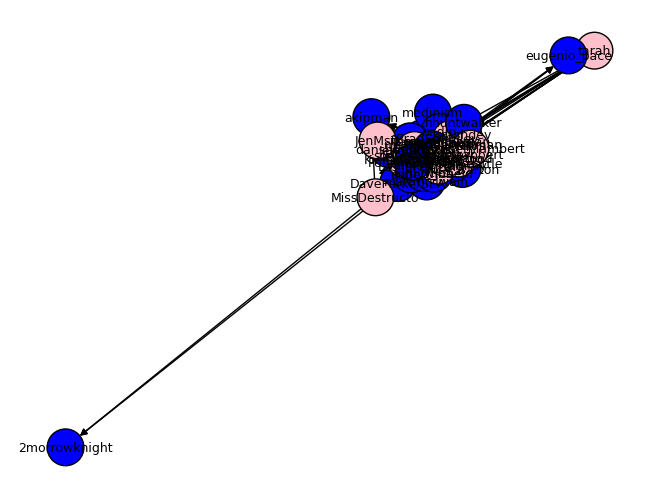

In [ ]:
# Load data
edges = pd.read_excel(linkGoogle, sheet_name="edges")  # Load edges
attr = pd.read_excel(linkGoogle, sheet_name="attributes")  # Load attributes

# Create a directed graph (data is asymmetric)
G = nx.DiGraph()

# Add edges with weights
for _, row in edges.iterrows():
    G.add_edge(row["source"], row["target"], weight=row["weight"])

# Add node attributes
attr_dict = attr.set_index("name")["male"].to_dict()
nx.set_node_attributes(G, attr_dict, "male")

# Assign colors (gender)
node_colors = ["blue" if G.nodes[node]["male"] == 1 else "pink" for node in G.nodes()]

# Draw graph
nx.draw(G, with_labels=True, node_color=node_colors, edgecolors='black', node_size=700, font_size=9)

# Save GraphML file
nx.write_graphml(G, "case2.graphml")


Case 3

In [ ]:
fifaLink = "https://github.com/DACSS-CSSmeths/Networks_intro/raw/refs/heads/main/casesData/fifa2022.xlsx"
fifa=pd.read_excel(fifaLink,sheet_name='fifa2022')

fifa.head()

#Focusing on name, club, and nationality
fifa.loc[:,['name','club','nationality']]

,name,club,nationality
0,Hernán Galíndez,Aucas,Ecuador
1,Félix Torres,Santos Laguna,Ecuador
2,Piero Hincapié,Bayer Leverkusen,Ecuador
3,Robert Arboleda,São Paulo,Ecuador
4,José Cifuentes,Los Angeles FC,Ecuador
...,...,...,...
826,Martín Cáceres,LA Galaxy,Uruguay
827,Sergio Rochet,Nacional,Uruguay
828,Agustín Canobbio,Athletico Paranaense,Uruguay
829,Manuel Ugarte,Sporting CP,Uruguay


Testing player-country:

As you can see, countries also divide the players (just as clubs divide the players), so it is not possible that player belongs to two countires.

---



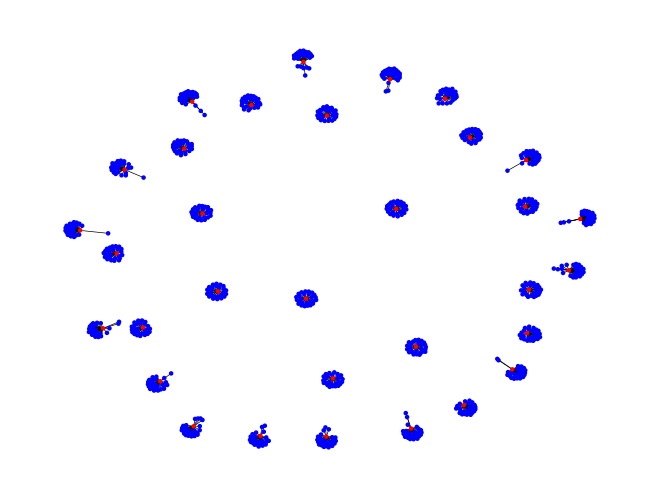

In [ ]:
fifanet_test = nx.Graph()
fifanet_test.add_nodes_from(fifa.name, bipartite=0) # Add the node attribute "bipartite"
fifanet_test.add_nodes_from(fifa.nationality, bipartite=1) # Add the node attribute "bipartite"
fifanet_test.add_edges_from([c for c in zip(fifa.name,fifa.nationality)])

players_nodes = {n for n, d in fifanet_test.nodes(data=True) if d["bipartite"] == 0}
country_nodes = set(fifanet_test) - players_nodes

pos = nx.spring_layout(fifanet_test)
color_dict = {0:'b',1:'r'}
color_list = [color_dict[i[1]] for i in fifanet_test.nodes.data('bipartite')]
nx.draw(fifanet_test, pos=pos, with_labels=False,node_size=5,width=0.5,node_color = color_list)

Preparing club-country:

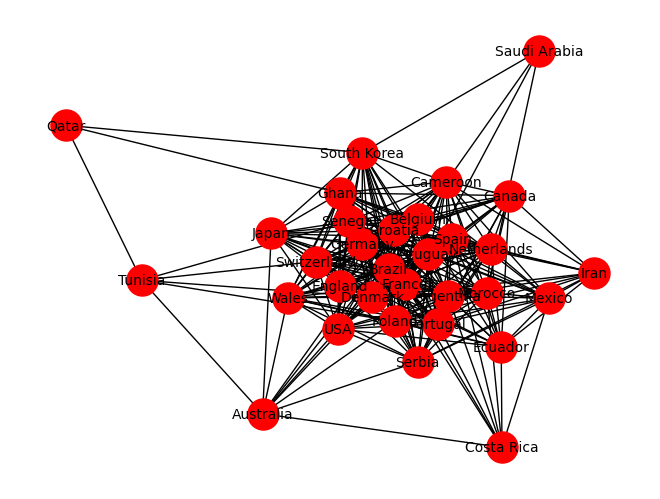

In [ ]:
import matplotlib.pyplot as plt
# Weights
edge_weights = fifa.groupby(['club', 'nationality']).size().reset_index(name='weight')

# Create bipartite graph
fifanet_cc = nx.Graph()
fifanet_cc.add_nodes_from(fifa.club, bipartite=0)
fifanet_cc.add_nodes_from(fifa.nationality, bipartite=1)

# Add weighted edges (club, nationality, weight = player count)
fifanet_cc.add_weighted_edges_from(edge_weights.values)

# Club projection
club_nodes = {n for n, d in fifanet_cc.nodes(data=True) if d['bipartite'] == 0}
club_proj = bipartite.weighted_projected_graph(fifanet_cc, club_nodes)

# Country projection
country_nodes = set(fifanet_cc) - club_nodes
country_proj = bipartite.weighted_projected_graph(fifanet_cc, country_nodes)

# Draw bipartite
pos = nx.spring_layout(fifanet_cc)
color_dict = {0: 'blue', 1: 'red'}
node_colors = [color_dict[d['bipartite']] for n, d in fifanet_cc.nodes(data=True)]

pos_country = nx.spring_layout(country_proj)
nx.draw(country_proj, pos=pos_country, with_labels=True, node_size=500, node_color='red', font_size=10, width=1)

# Saving
nx.write_graphml(club_proj, "club_projection.graphml")
nx.write_graphml(country_proj, "country_projection.graphml")

Where the club is projected, clubs are connected if they share a player from the same country. Where the country is projected, countries are connnected if players from the same countries play at the same clubs.